# CAPSTONE PROJECT

## Introduction

### Background
New York City which is a major city in New York is one the fastest growing cities in the U.S. This rapid growth of the city has attracted many people and businesses into New York. According to U.S. Census Bureau population estimates, New York City's population increased from 8,175,133 in April of 2010 to 8,398,748 in July of 2018. This is an increase of about 224,000 residents over the 2010 mark, or 2.7 percent (NYC, 2018). Along with new grocery stores and shopping malls, the number of restaurants has also increased. In 2019, as many as nearly 60 restaurants opened in the City of New York alone (Eater New York, 2019). In such a fast-growing city, small restaurants may find it difficult to survive in a highly competitive market. This is especially true for startup restaurants with limited funding, resources, and information about the local business of New York City.
### Business Problem
In this case, as a data scientist, you were asked by a client to find the most appropriate location for a new restaurant. Your client is a Korean cook from South Korea who has no information about the geography of New York City, New York. Your client wants to open a small Korean restaurant in the city and expects you to help him find a hot spot for his new business. Additionally, it would be helpful to give your client a few tips based on the highest-rated Korean restaurant in NYC. Therefore, our business problem will be: "In New York, if someone is looking to open a Korean restaurant, where would you recommend that he open it?"  and “What restaurant tips would you give to this person?”
### Interest
New business entrants would be interested in accurate prediction of the most beneficial hot spot in New York for competitive advantage and business values. Investors, marketers, and customers including the residents and tourists may also be interested in the hot spot of NYC.

## Data Section
We will need to first collect the location data of all Korean restaurants in New York. Our location data will include the Korean restaurants' name, id, postal code, latitude, longitude, rating, tips, and address. We will access data through the FourSquare API interface to explore the geography of New York, locate all venues, and filter by Korean restaurants.
Then, we will use the visualization library, Folium, to visualize the results. Using this location data, we will be able to find the hot spot and recommend the most appropriate location for our client's new Korean restaurant in the city.

### Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import requests
import random # library for random number generation
#from bs4 import BeautifulSoup
import os
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

print('Done!')

Done!


### Define Foursquare Credentials and Version

In [3]:
CLIENT_ID = 'MXIEHFGIFVKLO334SDWDS2Z1MVH2PFTK4IBTCAQCHSF1SJU0' 
CLIENT_SECRET = 'DBACMBHHY1EWTKQN0YWLEUOOIH5KC01QKGSG2SQF2X3GGQK1' 
VERSION = '20200717'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)

Your credentails:
CLIENT_ID: MXIEHFGIFVKLO334SDWDS2Z1MVH2PFTK4IBTCAQCHSF1SJU0


In [3]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

### Get our New York data.

In [4]:
ny_data = get_new_york_data()
ny_data

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


### Our bar graph shows that Queens has the most number of neighborhoods per Borough.

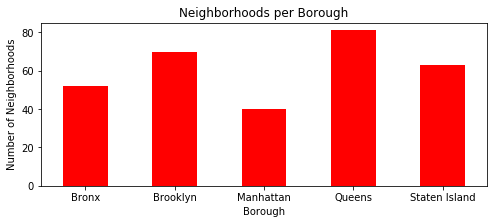

In [5]:
clr = "red"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(8,3), color=clr)
plt.title('Neighborhoods per Borough', fontsize = 12)
plt.xlabel('Borough', fontsize = 10)
plt.ylabel('Number of Neighborhoods',fontsize = 10)
plt.xticks(rotation = 'horizontal')
plt.show()

### Let's examine how many Korean restaurants are in each neighborhood.

In [6]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
korean_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    korean_resturants=venues[venues['Category']=='Korean Restaurant']   
    print('(',count,'/',len(ny_data),')','Korean Resturants in '+Neighborhood+', '+Borough+':'+str(len(korean_resturants)))
    print(row)
    for resturant_detail in korean_resturants.values.tolist():
        id, name , category=resturant_detail
        korean_rest_ny = korean_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Korean Resturants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Korean Resturants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Korean Resturants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Korean Resturants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Korean Resturants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Korean Resturants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Korean Resturants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Korean Resturants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Korean Resturants in Norwood, Bronx:0
['Bronx', 'Norwood',

In [7]:
korean_rest_ny.to_csv('korean_rest_ny_tocsv1.csv')

In [8]:
korean_rest_ny = pd.read_csv('korean_rest_ny_tocsv1.csv')
korean_rest_ny.head()

,Unnamed: 0,Borough,Neighborhood,ID,Name
0,0,Brooklyn,Brighton Beach,4c9d5c0303133704a96f5ed5,Cafe At Your Mother-in-Law
1,1,Brooklyn,Prospect Heights,4fa162e0e4b0badc81404a51,Kimchi Grill
2,2,Brooklyn,Williamsburg,52bf3053498e754b09a440b5,Dotory
3,3,Brooklyn,North Side,43db5698f964a5208a2e1fe3,Dokebi
4,4,Brooklyn,North Side,59c295349b04732c1d51aa52,Kimbap Lab


### Our bar graph shows that Queens has the most number of Korean restaurants per Borough.

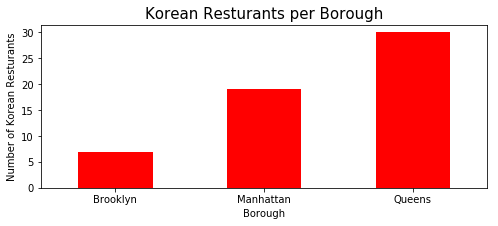

In [9]:
korean_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(8,3), color = clr)
plt.title('Korean Resturants per Borough', fontsize = 15)
plt.xlabel('Borough', fontsize = 10)
plt.ylabel('Number of Korean Resturants', fontsize=10)
plt.xticks(rotation = 'horizontal')
plt.show()

### Our bar graph further represents that Murray Hill, Queens has the most number of Korean restaurants per Neighborhood.

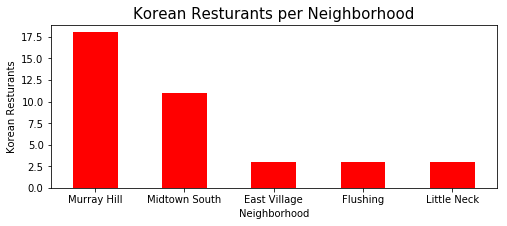

In [10]:
NOofNeigh = 5
korean_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(8,3), color=clr)
plt.title('Korean Resturants per Neighborhood', fontsize = 15)
plt.xlabel('Neighborhood', fontsize = 10)
plt.ylabel('Korean Resturants', fontsize=10)
plt.xticks(rotation = 'horizontal')
plt.show()

### Let's take a closer look into these Korean restaurants in Murray Hill, Queens, NY.

In [11]:
korean_rest_ny[korean_rest_ny['Neighborhood']=='Murray Hill']

,Unnamed: 0,Borough,Neighborhood,ID,Name
24,24,Queens,Murray Hill,4b830e44f964a520ebf430e3,Hahm Ji Bach - 함지박
25,25,Queens,Murray Hill,4b8f0931f964a520d04533e3,Mapo BBQ
26,26,Queens,Murray Hill,4baeabe6f964a52037cd3be3,Kum Sung Chik Naengmyun
27,27,Queens,Murray Hill,5590598a498eb1c3f975b6a6,Mr. Tofu
28,28,Queens,Murray Hill,4c7ad3dda86837048bee144d,Geo Si Gi Restaurant
29,29,Queens,Murray Hill,56db53cc498eed9b68621019,SGD Tofu House & BBQ
30,30,Queens,Murray Hill,5518a1a8498e4c7fe6268b88,Jongro BBQ
31,31,Queens,Murray Hill,4ca67385b7106dcb6e3b5ea5,Bonjuk Korean Traditional Porridge Restaurant
32,32,Queens,Murray Hill,4ad3bfabf964a52016e620e3,Han Joo
33,33,Queens,Murray Hill,569ada51498eb50a95dab87f,Pizza Maru


### Import our visualization tool.

In [4]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                       

In [11]:
address = 'Murray Hill, Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Murray Hill are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Murray Hill are 40.76, -73.8130556.


### Let's get these Korean restaurant's overall rating.

In [12]:
venue_id = '4ad3bfabf964a52016e620e3' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4ad3bfabf964a52016e620e3?client_id=MXIEHFGIFVKLO334SDWDS2Z1MVH2PFTK4IBTCAQCHSF1SJU0&client_secret=DBACMBHHY1EWTKQN0YWLEUOOIH5KC01QKGSG2SQF2X3GGQK1&v=20200717'

### Send GET request for result

In [13]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '4ad3bfabf964a52016e620e3',
 'name': 'Han Joo',
 'contact': {'phone': '7183596888', 'formattedPhone': '(718) 359-6888'},
 'location': {'address': '41-06 149th Pl',
  'crossStreet': 'at 41st Ave',
  'lat': 40.762274065368665,
  'lng': -73.8147692298185,
  'labeledLatLngs': [{'label': 'display',
    'lat': 40.762274065368665,
    'lng': -73.8147692298185}],
  'postalCode': '11355',
  'cc': 'US',
  'city': 'Flushing',
  'state': 'NY',
  'country': 'United States',
  'formattedAddress': ['41-06 149th Pl (at 41st Ave)',
   'Flushing, NY 11355',
   'United States']},
 'canonicalUrl': 'https://foursquare.com/v/han-joo/4ad3bfabf964a52016e620e3',
 'categories': [{'id': '4bf58dd8d48988d113941735',
   'name': 'Korean Restaurant',
   'pluralName': 'Korean Restaurants',
   'shortName': 'Korean',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 20},
 'price': {'tier': 2, 'messag

### Check the rating and repeat to other Korean restaurants

In [14]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.1


In [15]:
venue_id = '5590598a498eb1c3f975b6a6' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.8


In [16]:
venue_id = '4b8f0931f964a520d04533e3' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

8.5


In [17]:
venue_id = '4baeabe6f964a52037cd3be3' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.9


In [18]:
venue_id = '4c7ad3dda86837048bee144d' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.7


In [19]:
venue_id = '56db53cc498eed9b68621019' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

8.1


In [20]:
venue_id = '5518a1a8498e4c7fe6268b88' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.4


In [21]:
venue_id = '4ca67385b7106dcb6e3b5ea5' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.0


In [22]:
venue_id = '569ada51498eb50a95dab87f' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.2


In [23]:
venue_id = '51c612d9498e52a02241e27b' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.1


In [24]:
venue_id = '5cbb9019237dee002cb9f069' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.7


In [25]:
venue_id = '5078a6d6e4b065f1dcd66110' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.0


In [26]:
venue_id = '4e665433b0fb188e8f56fb2b' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.8


In [27]:
venue_id = '58756dc845c3ed5546c88309' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.0


In [28]:
venue_id = '5147a0bce4b09c3bed35c23b' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.6


In [29]:
venue_id = '4ec2cccf8231a83de8cf15ed' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.0


In [30]:
venue_id = '4d85677302eb5481ee0744f5' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.0


In [31]:
venue_id = '4b830e44f964a520ebf430e3' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

8.7


### Among 18 Korean restaurants in Murray Hill, Hahm Ji Bach - 함지박 has earned the highest rating (=8.7). Therefore, we will explore more about Hahm Ji Bach - 함지박. Let's get Hahm Ji Bach - 함지박's tips. First, get the number of tips.

In [32]:
result['response']['venue']['tips']['count']

81

### Create URL and send GET request.

In [33]:
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f13c9d1e2168a4ac4c2f437'},
 'response': {'tips': {'count': 81,
   'items': [{'id': '56085bc8498e278339db5ed3',
     'createdAt': 1443388360,
     'text': "Sides are free refill. Get the pork belly and duck, it's delicious. Authentic Korean BBQ experience. Be sure to celebrate a birthday here. Also, raspberry wine is so good.",
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/56085bc8498e278339db5ed3',
     'photo': {'id': '56085bc9498e7b8bc17584a6',
      'createdAt': 1443388361,
      'source': {'name': 'Foursquare for iOS',
       'url': 'https://foursquare.com/download/#/iphone'},
      'prefix': 'https://fastly.4sqi.net/img/general/',
      'suffix': '/583546_aRakfXkqeMdOIeRCmwIIc9_h9Ozz20fqH3tWmOKshtc.jpg',
      'width': 1440,
      'height': 1440,
      'visibility': 'public'},
     'photourl': 'https://fastly.4sqi.net/img/general/original/583546_aRakfXkqeMdOIeRCmwIIc9_h9Ozz20fqH3tWmOKshtc.jpg',
     'lang': 'en',
     

### Get tips and list of associated features.

In [34]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'photo', 'photourl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user', 'authorInteractionType'])

### Format column width and display all tips

In [35]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"Sides are free refill. Get the pork belly and duck, it's delicious. Authentic Korean BBQ experience. Be sure to celebrate a birthday here. Also, raspberry wine is so good.",6,0,56085bc8498e278339db5ed3,Hector,NaN,NaN,583546


### Because we are using a personal developer account, we accessed only 2 of the restaurant's tips, instead of all 15 tips. Based on this result, we can recommend a few tips to our client for his new Korean restaurant.

### Next, we should examine the hotspot for our restaurant. First, send the GET request.

In [69]:
import requests

request_parameters = {
    "client_id": CLIENT_ID,
    "client_secret": CLIENT_SECRET,
    "v": '20200716',
    "section": "food",
    "near": "new_york_city",
    "radius": 1000,
    "limit": 30}

data = requests.get("https://api.foursquare.com/v2/venues/explore", params=request_parameters)

### Transform data into json

In [70]:
d = data.json()["response"]
d.keys()

dict_keys(['suggestedFilters', 'geocode', 'headerLocation', 'headerFullLocation', 'headerLocationGranularity', 'query', 'totalResults', 'suggestedBounds', 'groups'])

In [71]:
d["headerLocationGranularity"], d["headerLocation"], d["headerFullLocation"]

('city', 'New York', 'New York')

In [72]:
d["suggestedBounds"], d["totalResults"]

({'ne': {'lat': 40.744560657653366, 'lng': -73.98789987620886},
  'sw': {'lat': 40.73885916600263, 'lng': -73.99703259961395}},
 250)

### Request Geocode

In [73]:
d["geocode"]

{'what': '',
 'where': 'new york city',
 'center': {'lat': 40.742185, 'lng': -73.992602},
 'displayString': 'New York, NY, United States',
 'cc': 'US',
 'geometry': {'bounds': {'ne': {'lat': 40.882214, 'lng': -73.907},
   'sw': {'lat': 40.679548, 'lng': -74.047285}}},
 'slug': 'new-york-city-new-york',
 'longId': '72057594043056517'}

### Create groups

In [74]:
d["groups"][0].keys()

dict_keys(['type', 'name', 'items'])

In [75]:
d["groups"][0]["type"], d["groups"][0]["name"]

('Recommended Places', 'recommended')

### Create items of objects

In [76]:
items = d["groups"][0]["items"]
print("number of items: %i" % len(items))
items[0]

number of items: 30


{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '5a0e475b018cbb6a2196479e',
  'name': 'Sushi By Bou',
  'location': {'address': '49 W 20th St',
   'lat': 40.740883116531,
   'lng': -73.99352459209372,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.740883116531,
     'lng': -73.99352459209372}],
   'postalCode': '10011',
   'cc': 'US',
   'city': 'New York',
   'state': 'NY',
   'country': 'United States',
   'formattedAddress': ['49 W 20th St',
    'New York, NY 10011',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d1d2941735',
    'name': 'Sushi Restaurant',
    'pluralName': 'Sushi Restaurants',
    'shortName': 'Sushi',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/sushi_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-3-5a0e475b018cbb6a2196479e-0'}

### Organize the output with attributes

In [77]:
import pandas as pd # library for data analsysis

df_raw = []
for item in items:
    venue = item["venue"]
    categories, uid, name, location = venue["categories"], venue["id"], venue["name"], venue["location"]
    print(location)
    assert len(categories) == 1
    shortname = categories[0]["shortName"]
    address =  ''
    if hasattr(location, 'address'):
      address = location['address']
    if not "postalCode" in location:
        continue
    postalcode = location["postalCode"]
    lat = location["lat"]
    lng = location["lng"]
    datarow = (uid, name, shortname, address, postalcode, lat, lng)
    df_raw.append(datarow)
df = pd.DataFrame(df_raw, columns=["uid", "name", "shortname", "address", "postalcode", "lat", "lng"])

{'address': '49 W 20th St', 'lat': 40.740883116531, 'lng': -73.99352459209372, 'labeledLatLngs': [{'label': 'display', 'lat': 40.740883116531, 'lng': -73.99352459209372}], 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['49 W 20th St', 'New York, NY 10011', 'United States']}
{'address': '17 W 20th St', 'crossStreet': '6th Ave', 'lat': 40.74026030891992, 'lng': -73.99232433068579, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74026030891992, 'lng': -73.99232433068579}], 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['17 W 20th St (6th Ave)', 'New York, NY 10011', 'United States']}
{'address': '678 Avenue of the Americas', 'lat': 40.7416572, 'lng': -73.9933709, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7416572, 'lng': -73.9933709}], 'postalCode': '10010', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'forma

### Get coordinate of New York.

In [78]:
NY_center = d["geocode"]["center"]
NY_center

{'lat': 40.742185, 'lng': -73.992602}

### Import visualization tools

In [79]:
from folium import plugins
from IPython.display import display
import matplotlib.cm as cm
import matplotlib.colors as colors

### Create heatmap

In [80]:
map_NY = folium.Map(location=[40.742185, -73.992602], zoom_start=14)

def add_markers(df):
    for (j, row) in df.iterrows():
        label = folium.Popup(row["name"], parse_html=True)
        folium.CircleMarker(
            [row["lat"], row["lng"]],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_NY)
        
add_markers(df)
hm_data = df[["lat", "lng"]].to_numpy().tolist()
map_NY.add_child(plugins.HeatMap(hm_data))

map_NY

### Our heatmap shows the hotspot of restaurants in New York City.

### Now locate our hotspot for the restaurant.

In [81]:
lat = 40.742185
lng = -73.992602

map_NY = folium.Map(location=[lat, lng], zoom_start=16)
add_markers(df)
folium.CircleMarker(
    [lat, lng],
    radius=15,
    popup="YUM!",
    color='green',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_NY)
map_NY

### Our map shows that in the upper right of our target location there is Koreatown. Also, in the right side of our target location, there is Madison Square Park where many tourists and NY residents visit. Therefore, we recommend our client to open his new restaurant in this location marked by the blue circle.